In [13]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [11]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix', save_name='dummy'):
    '''
    cm : confusion matrix(numpy)
    cmap : figure property(str)
    normalize : normalize(bool)
    label : confusion matrix label(iterator)
    title : confusion matrix title(str)
    save_name : filename(str)
    '''
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Recall
        
    plt.figure(figsize=(20, 20))  # 전체 figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize=15)
        plt.yticks(tick_marks, target_names, fontsize=15)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize=20)  # confusion_matrix 글씨크기 변경
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize=20)  # confusion_matrix 글씨크기 변경

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)  # ylabel
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=20) #xlabel
    plt.savefig(save_name)
    plt.show()

In [5]:
from sklearn.metrics import classification_report
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names, output_dict=False))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

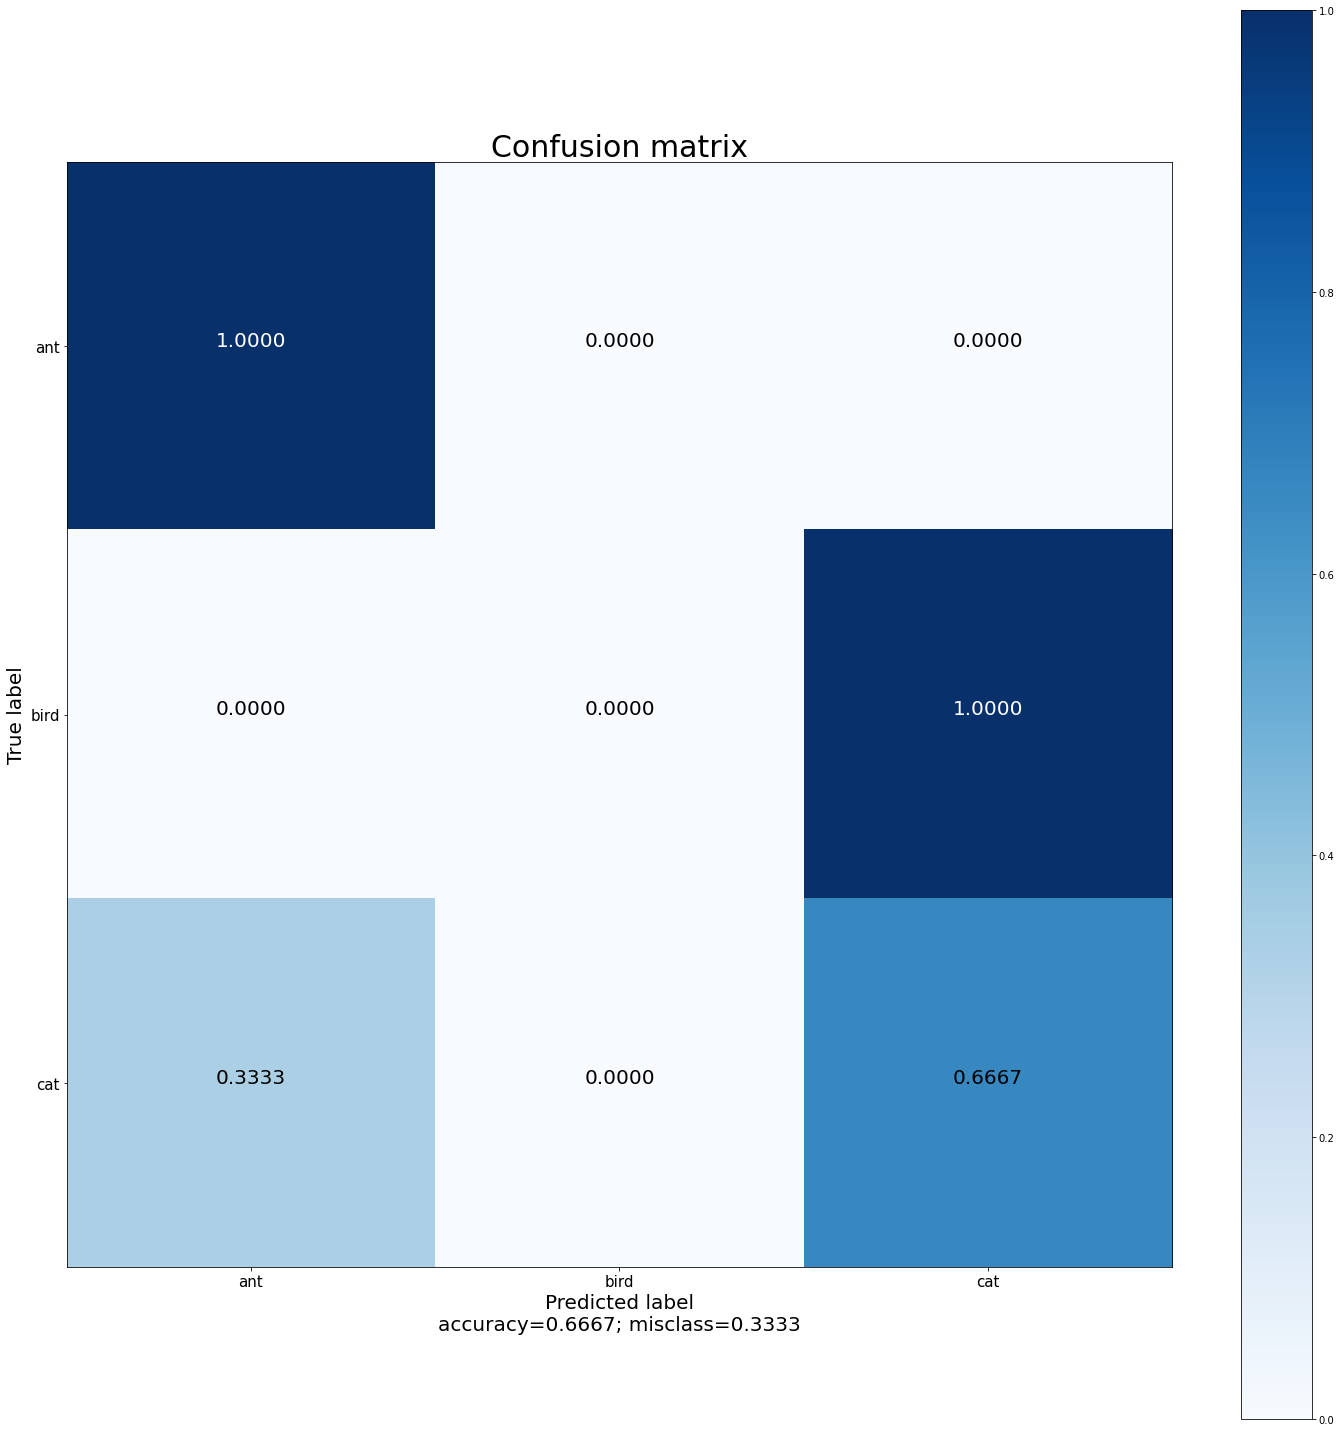

In [14]:
plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])